In [427]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [428]:
def img_plt(color_img, title, pos):
    img_RGB = color_img[:, :, ::-1]
    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

def grayhist_plt(hist, title, pos, color):

    ax = plt.subplot(2, 3, pos)
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("Number of Pixels")
    plt.xlim([0, 256])
    plt.plot(hist, color=color)

plt.figure(figsize=(40, 20))
plt.suptitle("GrayScale Histogram Equalization with cv2.equalieHist()", fontsize=10) 


Text(0.5, 0.98, 'GrayScale Histogram Equalization with cv2.equalieHist()')

<Figure size 2880x1440 with 0 Axes>

In [429]:
image = cv2.imread("images/lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


Creating Histogram with ``cv2.calcHist``

In [430]:
hist = cv2.calcHist([gray_image],[0],None, [256],[0, 256])

Equalize Image, and Calculate Histogram

In [431]:
gray_image_eq = cv2.equalizeHist(gray_image)
hist_eq = cv2.calcHist([gray_image_eq],[0],None,[256],[0, 256])

Adding 35 to every pixel of GRAYSCALE image

In [432]:
M = np.ones(gray_image.shape, dtype="uint8") * 35
added_image = cv2.add(gray_image, M)

#Histogram of ADDED_IMAGE
hist_added_image = cv2.calcHist([added_image],[0],None,[256],[0, 256])

###### Equalizing ADDED_IMAGE and calculating Histogram

In [433]:
added_image_eq = cv2.equalizeHist(added_image)
hist_added_image_eq = cv2.calcHist([added_image_eq],[0], None, [256],[0, 256])

Subtract 35 from every pixel of GRAYSCALE and calculating Histogram

In [434]:
subtracted_image = cv2.subtract(gray_image, M)
hist_subtracted_image = cv2.calcHist([subtracted_image],[0],None,[256],[0, 256])

###### Equalize Subtracted Image and calculate Histogram

In [435]:
subtracted_image_eq = cv2.equalizeHist(subtracted_image)
hist_subtracted_image_eq = cv2.calcHist([subtracted_image_eq],[0],None, [256],[0, 256])

#### Plotting Image and Histogram __without Equalization__

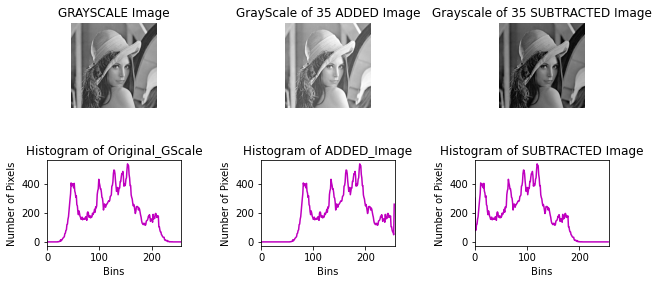

In [439]:
img_plt(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "GRAYSCALE Image",1)
grayhist_plt(hist, "Histogram of Original_GScale", 4, "m")
img_plt(cv2.cvtColor(added_image, cv2.COLOR_GRAY2BGR), "GrayScale of 35 ADDED Image", 2)
grayhist_plt(hist_added_image, "Histogram of ADDED_Image",5, "m")
img_plt(cv2.cvtColor(subtracted_image, cv2.COLOR_GRAY2BGR),"Grayscale of 35 SUBTRACTED Image",3)
grayhist_plt(hist_subtracted_image, "Histogram of SUBTRACTED Image",6, "m")

plt.subplots_adjust(top=0.9, right=5.3, left=4, wspace=0.6, hspace=0.6)
# plt.tight_layout()
plt.show()

#### Plotting Images and Histograms __with Equalization__:


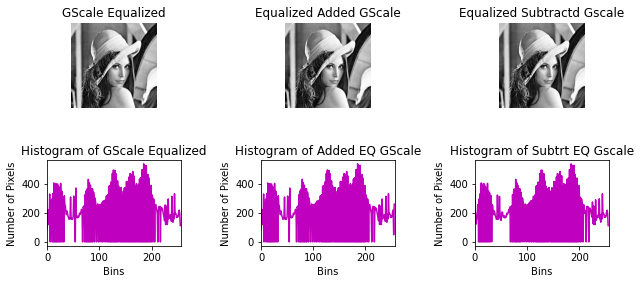

In [442]:
img_plt(cv2.cvtColor(gray_image_eq, cv2.COLOR_GRAY2BGR), "GScale Equalized", 1)
grayhist_plt(hist_eq, "Histogram of GScale Equalized", 4, 'm')
img_plt(cv2.cvtColor(added_image_eq, cv2.COLOR_GRAY2BGR), "Equalized Added GScale", 2)
grayhist_plt(hist_added_image_eq, "Histogram of Added EQ GScale", 5, 'm')
img_plt(cv2.cvtColor(subtracted_image_eq, cv2.COLOR_GRAY2BGR), "Equalized Subtractd Gscale", 3)
grayhist_plt(hist_subtracted_image_eq, "Histogram of Subtrt EQ Gscale", 6, 'm')

plt.subplots_adjust(top=0.9, right=5.3, left=4, wspace=0.6, hspace=0.6)
# plt.tight_layout()
plt.show()

